In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Brute Force Matching with ORB Descriptors

In [2]:
def display(image):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap='gray')

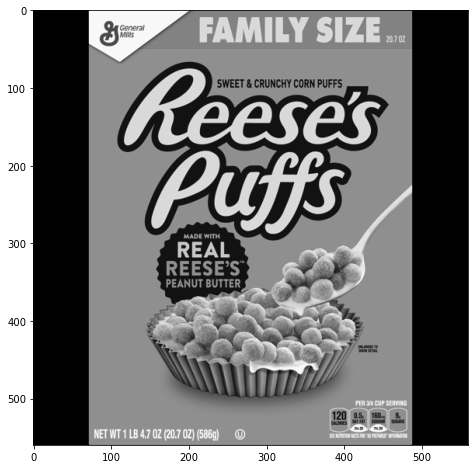

In [3]:
reeses_puffs = cv2.imread('../DATA/reeses_puffs.png',0)
display(reeses_puffs);

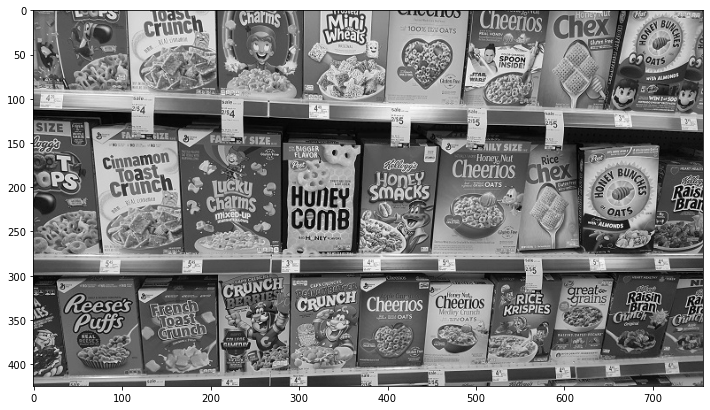

In [4]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)
display(cereals);

In [5]:
orb_descriptor = cv2.ORB_create()
orb_descriptor

< cv2.ORB 000001BEBE52E110>

In [6]:
kp1, des1 = orb_descriptor.detectAndCompute(reeses_puffs,None)
kp2, des2 = orb_descriptor.detectAndCompute(cereals,None)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [8]:
matches = bf.match(des1,des2)

In [9]:
matches[0].distance

56.0

In [10]:
matches = sorted(matches,key=lambda x: x.distance)

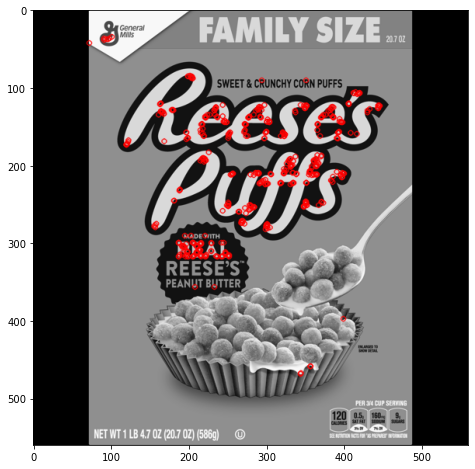

In [11]:
display(cv2.drawKeypoints(reeses_puffs,kp1,cv2.DRAW_MATCHES_FLAGS_DEFAULT,(255,0,0)));

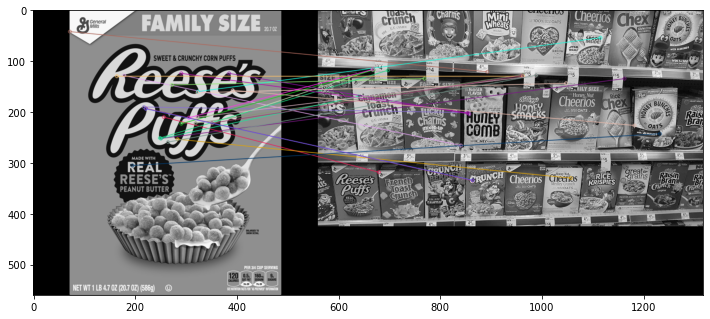

In [12]:
display(cv2.drawMatches(reeses_puffs,kp1,cereals,kp2,matches[:25],None,flags=2));

In [13]:
sift = cv2.xfeatures2d.SIFT_create()

In [15]:
kp1, des1 = sift.detectAndCompute(reeses_puffs,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [20]:
bf = cv2.BFMatcher()

In [21]:
matches = bf.knnMatch(des1,des2,k=2)

In [22]:
len(matches)

1501

In [24]:
good = []

for match1, match2 in matches:
    # IF MATCH 1 DISTANCE IS LESSER THAN 75% OF MATCH 2 DISTANCE, RETAIN THE CLOSEST MATCH AND LET'S KEEP IT!
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [25]:
len(good)

79

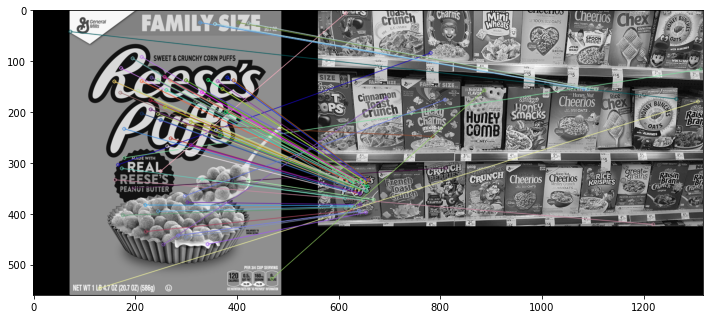

In [26]:
sift_matches = cv2.drawMatchesKnn(reeses_puffs,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches);

In [28]:
sift = cv2.xfeatures2d.SIFT_create()
sift

< cv2.SIFT 000001BEC6982890>

In [29]:
kp1, des1 = sift.detectAndCompute(reeses_puffs,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [30]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=10)
search_params = dict(checks=50)

In [31]:
# IN GENERAL, FLANN IS A QUICKER ALGORITHM AS COMPARED TO SIFT AND ORB DESCRIPTORS. IT FINDS GENERAL MATCHES INSTEAD OF VERY SPECIFIC MATCHES.
flann = cv2.FlannBasedMatcher(index_params,search_params)
flann

< cv2.FlannBasedMatcher 000001BEC6982BF0>

In [32]:
matches = flann.knnMatch(des1,des2,k=2)

In [33]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

In [34]:
len(good)

67

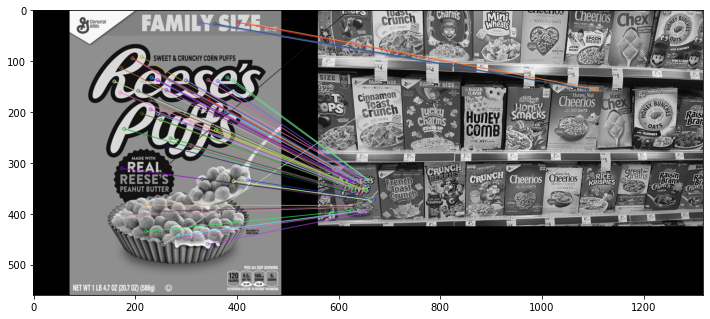

In [37]:
flann_matches = cv2.drawMatchesKnn(reeses_puffs,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches);

In [42]:
matchesMask = [[0,0] for i in range(len(matches))]

In [43]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1,0]

In [47]:
draw_params = dict(matchColor = (0,0,255),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

In [48]:
flann_matches = cv2.drawMatchesKnn(reeses_puffs,kp1,cereals,kp2,matches,None,**draw_params)

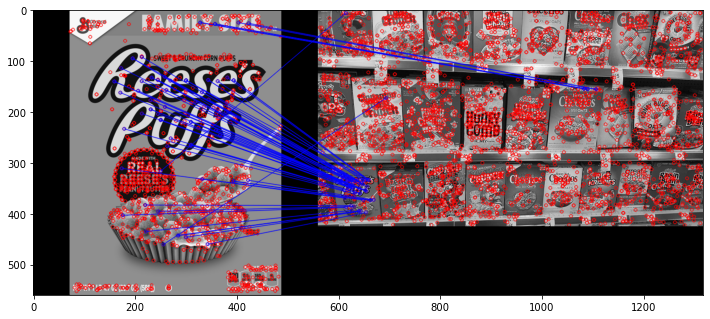

In [49]:
display(flann_matches);